In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import activations
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


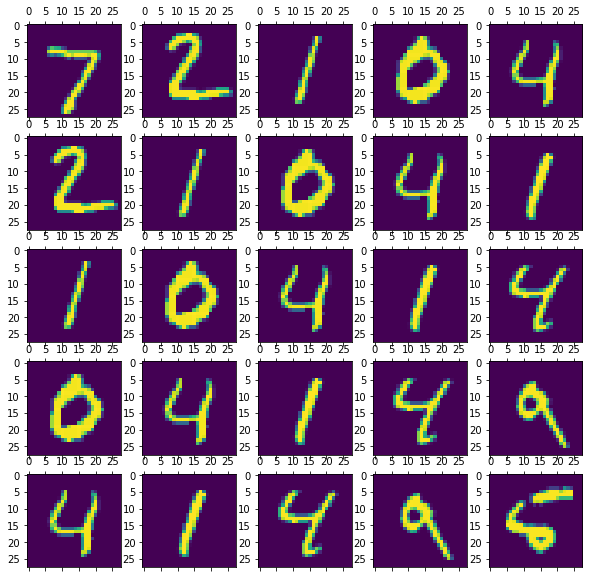

In [ ]:
fig, axis = plt.subplots(5,5, figsize=(10,10))
for i in range(5):
  for j in range(5):
    axis[i,j].matshow(x_test[i+j])

In [ ]:
def my_model():
  inputs = keras.Input(shape=(28,28,1))
  x = layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1))(inputs)
  x = layers.MaxPooling2D()(x)
  x = layers.Conv2D(32, (3,3), activation='relu')(x)
  x = layers.MaxPooling2D()(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(784, activation='relu')(x)
  outputs = layers.Dense(10, activation='softmax')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

In [ ]:
model = my_model()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0   

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=3e-4), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=64)
model.evaluate(x_test, y_test)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


938/938 [==============================] - 4s 4ms/step - loss: 0.0327 - accuracy: 0.9891
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0260 - accuracy: 0.9914
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0254 - accuracy: 0.9913
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0241 - accuracy: 0.9920
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0234 - accuracy: 0.9923
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0210 - accuracy: 0.9927
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0193 - accuracy: 0.9935
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9939


[0.019122976809740067, 0.9939000010490417]

Predicted value by model =  0
Actual value =  0


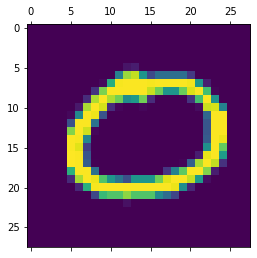

In [ ]:
predictions = model.predict(x_test)
i=69
plt.matshow(x_test[i])
print("Predicted value by model = ", np.argmax(np.round(predictions[i])) )
print("Actual value = ", y_test[i])